In [1]:
#ENG23CS0158

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")

In [4]:
df.size

3150000

In [5]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [6]:
df.describe

<bound method NDFrame.describe of               Date      Time    Booking ID   Booking Status   Customer ID  \
0       2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1       2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2       2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3       2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4       2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...            ...       ...           ...              ...           ...   
149995  2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
149996  2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
149997  2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
149998  2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
149999  2024-03-10  15:38:03  "CNR3447390"        Completed  "CID4108667"   

         Vehicle Type         Pickup Loca

In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Vehicle Type Distribution')

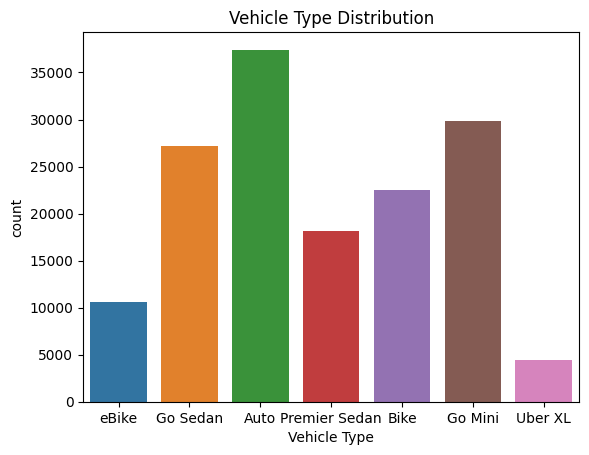

In [9]:
sns.countplot(x = "Vehicle Type", data=df)
plt.title("Vehicle Type Distribution")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Booking Value')

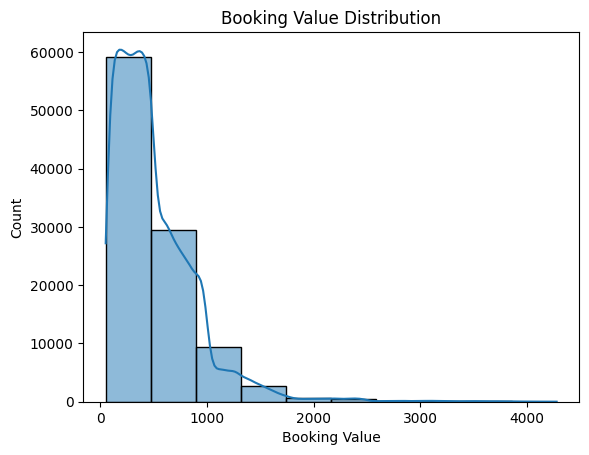

In [10]:
sns.histplot(df["Booking Value"], bins=10, kde=True)
plt.title("Booking Value Distribution")
plt.xlabel("Booking Value")

Text(0.5, 0, 'Ride Distance')

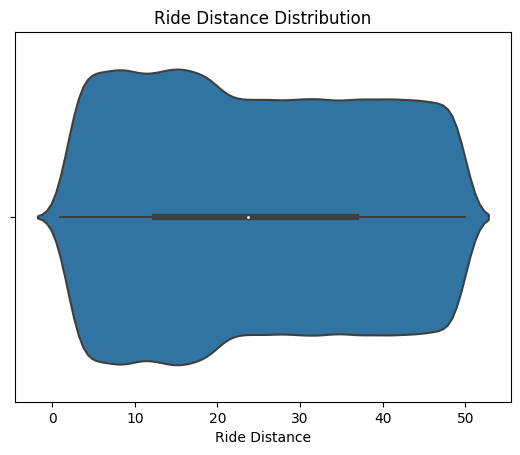

In [11]:
sns.violinplot(x="Ride Distance", data=df)
plt.title("Ride Distance Distribution")
plt.xlabel("Ride Distance")


Text(0, 0.5, 'Count')

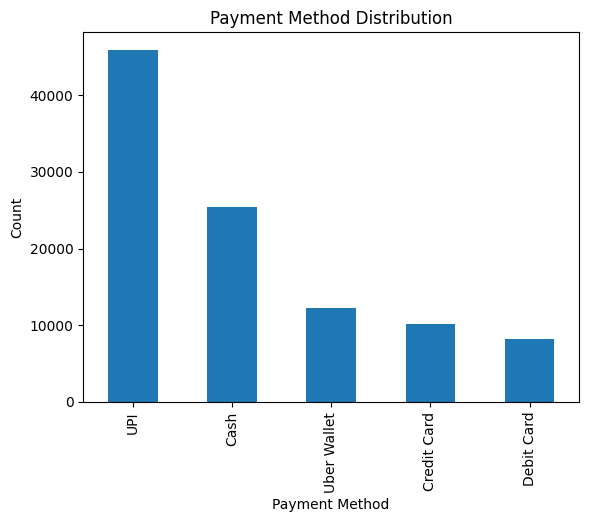

In [12]:
df['Payment Method'].value_counts().plot(kind='bar')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")


Text(0, 0.5, 'Customer Rating')

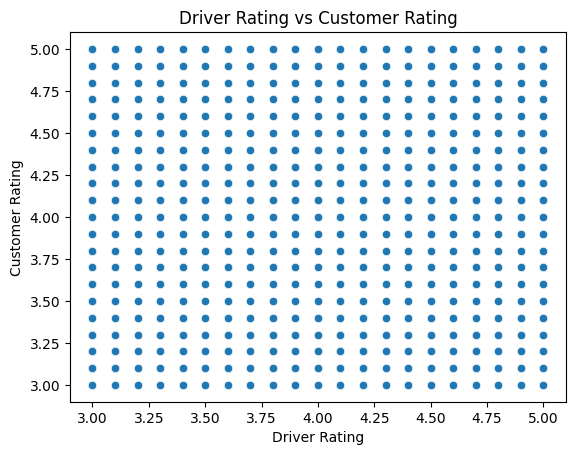

In [13]:
sns.scatterplot(x=df["Driver Ratings"], y=df["Customer Rating"])
plt.title("Driver Rating vs Customer Rating")
plt.xlabel("Driver Rating")
plt.ylabel("Customer Rating")


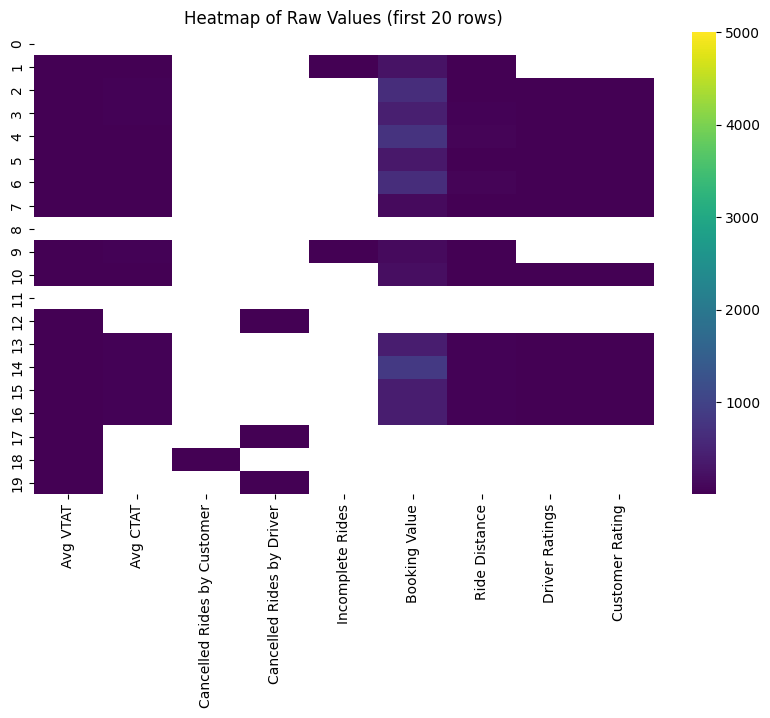

In [14]:
numeric_df = df.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.head(20), cmap="viridis", vmax=5000)
plt.title("Heatmap of Raw Values (first 20 rows)")
plt.show()


Text(0.5, 1.0, 'Booking Value by Vehicle Type')

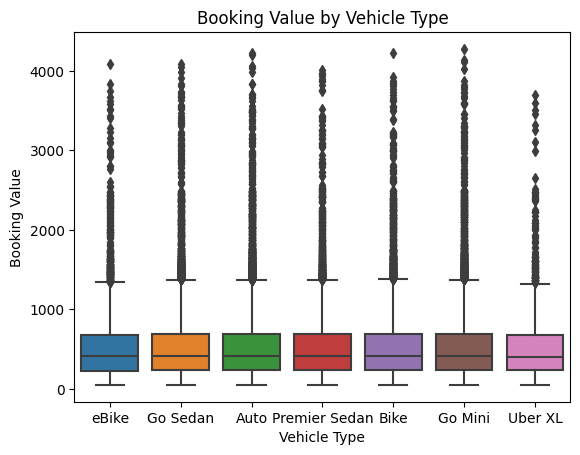

In [15]:
sns.boxplot(x="Vehicle Type", y="Booking Value", data=df)
plt.title("Booking Value by Vehicle Type")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


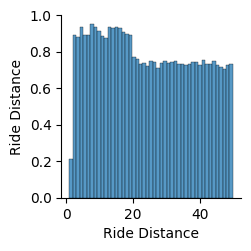

In [16]:
sns.pairplot(df[['Ride Distance']])
plt.show()

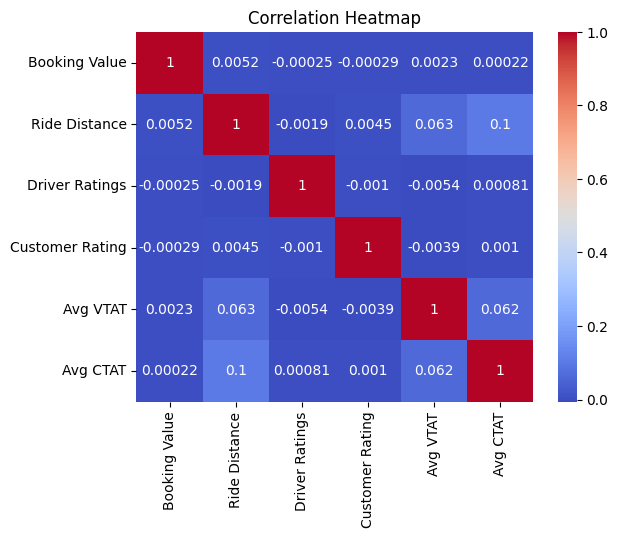

In [17]:
corr = df[['Booking Value','Ride Distance','Driver Ratings','Customer Rating','Avg VTAT','Avg CTAT']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
